# Leaky Integrate-and-Fire neurons (by hand)

Based on https://neuronaldynamics.epfl.ch/online/Ch1.S3.html, equation 1.5 describes the potential of the membrane $u$ given an input current $I$ and parameters $\tau = RC$, resistance $R$ and the rest potential $u_R$:
$$
\tau \frac{du}{dt} = -[u(t) - u_R] + R I(t)
$$

Along with the firing condition (if the potential $u$ reaches threshold $\vartheta$) 
$$
\lim_{\delta \rightarrow 0;\, \delta > 0} u(t^f - \delta) = u_0; \quad t^f = \{t | u_(t) = \vartheta\}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def equation(u, t, I, params):
    """Evaluation of du/dt = f(u,t)."""
    
    f = 1/params['tau'] * (-u + params['uR'] + params['R'] * I(t))
    
    return f

In [3]:
def RK4(h, u, t, I, params, equation):
    """Calculation of one Runge-Kutta of order 4 step"""
    
    F1 = equation(u, t, I, params=params) 
    
    F2 = equation(u + h/2, t + F1/2, I, params=params) 
    
    F3 = equation(u + h/2, t + F2/2, I, params=params) 
    
    F4 = equation(u + h, t + F3, I, params=params) 
    
    return u + (h/6) * (F1 + 2*F2 + 2*F3 + F4), t + h

In [4]:
def solve_system(h, I, params, equation=equation, t0=0, tmax=100):
    """Iterate the method from t0 to tmax, spiking if u above threshold"""
    
    u = params['u0']
    t = t0
    
    u_vals = [u]
    t_vals = [t]
    
    while round(t,1) < round(tmax,1):
        
        u, t = RK4(h, u, t, I=I, params=params, equation=equation)
        
        u_vals.append(u)
        t_vals.append(t)
        
        if u > params['theta']:
            print(f'u={u} spike at t={t}')
            u = params['u0']      
                  
    return u_vals, t_vals

## Simulations

In [12]:
params = {'u0': -30, 'tau': 15, 'uR': -40, 'R': 5, 'theta': 30}

### Exponential decay if no current

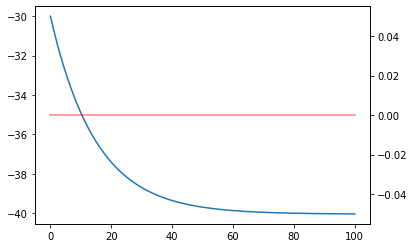

In [13]:
I = lambda t: 0
uv, tv = solve_system(0.1, I, params)
plt.plot(tv, uv)

plt.twinx()
I_list = [I(t) for t in tv]
plt.plot(tv, I_list, color='red', alpha=0.5)

### Constant (small) current

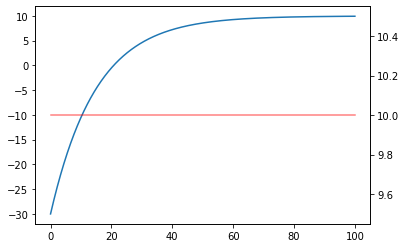

In [14]:
I = lambda t: 10
uv, tv = solve_system(0.1, I, params)
plt.plot(tv, uv)

plt.twinx()
I_list = [I(t) for t in tv]
plt.plot(tv, I_list, color='red', alpha=0.5)

### Constant (small) current

u=30.118320016929346 spike at t=16.499999999999964
u=30.118320016929346 spike at t=33.0000000000002
u=30.118320016929346 spike at t=49.50000000000043
u=30.118320016929346 spike at t=66.00000000000053
u=30.118320016929346 spike at t=82.49999999999959
u=30.118320016929346 spike at t=98.99999999999865


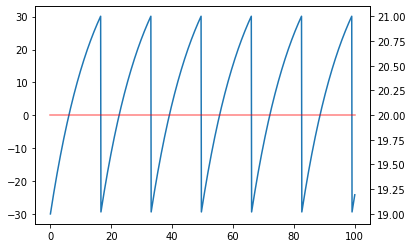

In [15]:
I = lambda x: 20
uv, tv = solve_system(0.1, I, params)
plt.plot(tv, uv)

plt.twinx()
I_list = [I(t) for t in tv]
plt.plot(tv, I_list, color='red', alpha=0.5)

### Short pulse current

In [16]:
def short_pulse(t, dt, I0, init=10):
    '''Short pulse of intensity I0'''
        
    I_pulse = 0
    
    if t > init and t < init + dt:
        I_pulse = I0
        
    return I_pulse
    

In [29]:
I_pulse = lambda t: short_pulse(t, 5, 80)

u=30.003506596084968 spike at t=16.207999999996826


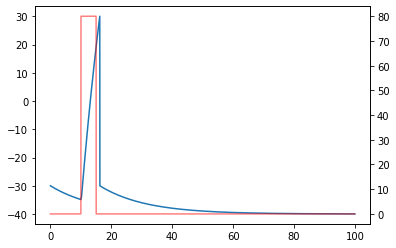

In [30]:
uv, tv = solve_system(0.001, I_pulse, params)
plt.plot(tv, uv)

plt.twinx()
I_list = [I_pulse(t) for t in tv]
plt.plot(tv, I_list, color='red', alpha=0.5)

### Increasing linear intensity

u=30.001031505801492 spike at t=70.27999999999905
u=30.0247428659793 spike at t=87.40000000000781


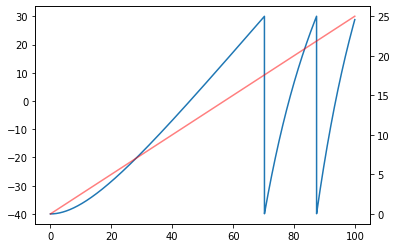

In [12]:
I = lambda t: t/4
uv, tv = solve_system(0.01, I, params)
plt.plot(tv, uv)

plt.twinx()
I_list = [I(t) for t in tv]
plt.plot(tv, I_list, color='red', alpha=0.5)

u=30.006771209708784 spike at t=6.28999999999991
u=30.021353445147735 spike at t=13.989999999999746
u=30.01281824330985 spike at t=25.160000000001133


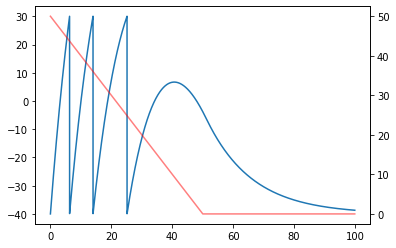

In [13]:
I = lambda t: max(50 - t,0)
uv, tv = solve_system(0.01, I, params)
plt.plot(tv, uv)

plt.twinx()
I_list = [I(t) for t in tv]
plt.plot(tv, I_list, color='red', alpha=0.5)